In [1]:
using Luxor
using Colors
using Plots
using IterTools
using DataFrames
using OpenStreetMapX
using LightOSM
using KernelDensity
using Downloads
include("../kernel_density.jl")
include("../distance.jl")
include("../prepare_data.jl")
include("../analyse.jl")
include("../plots.jl")

tile_plot (generic function with 1 method)

In [2]:
city = "Warszawa"
admin_level = "6"
search_area = 1000
attr = :education
wilderness_distance = 300
shape = "rectangle"
calculate_percent = true
num_of_points = 360
distance_sectors = 200.0
scrape_config = "../poi_config_test.csv"

"../poi_config_test.csv"

In [3]:
#scrp_config = OSMToolset.ScrapePOIConfig(DataFrame(CSV.File(scrape_config)))

In [4]:
points_heat,attr_heat,bounds_heat = calculate_attractiveness_for_city_points(                                      
                    city, #city_name
                    admin_level, #admin_level
                    search_area, #search_area
                    attr, #attr
                    wilderness_distance, #wilderness_distance
                    shape, #shape
                    calculate_percent = calculate_percent,
                    num_of_points = num_of_points,
                    scrape_config = scrape_config)
#attr_heat = matrix_log_scaling(attr_heat)


┌ Info: Saved map data to cache ../data/Warszawa.osm.cache
└ @ OpenStreetMapX /home/adamkas/.julia/packages/OpenStreetMapX/gCd33/src/parseMap.jl:110


(Union{Nothing, ENU}[ENU(Inf, Inf, Inf) ENU(Inf, Inf, Inf) … ENU(Inf, Inf, Inf) ENU(Inf, Inf, Inf); ENU(Inf, Inf, Inf) ENU(Inf, Inf, Inf) … ENU(Inf, Inf, Inf) ENU(Inf, Inf, Inf); … ; ENU(Inf, Inf, Inf) ENU(Inf, Inf, Inf) … ENU(Inf, Inf, Inf) ENU(Inf, Inf, Inf); ENU(Inf, Inf, Inf) ENU(Inf, Inf, Inf) … ENU(Inf, Inf, Inf) ENU(Inf, Inf, Inf)], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], 1881×5 DataFrame
  Row │ adminname  wayid       nodes        x        y       
      │ String     Int64       Int64        Float64  Float64 
──────┼──────────────────────────────────────────────────────
    1 │ Warszawa    189250475  10245691137  5243.22  8396.65
    2 │ Warszawa    189250475   8880938278  5286.19  8241.41
    3 │ Warszawa    189250475   8880938277  5313.13  8147.37
    4 │ Warszawa    189250475   8880938274  5331.63  8083.05
    5 │ Warszawa    189250475   8880938276  5371.68  7941.3
    6 │ Warszawa    189250475   1609040007  5374.36  7935.48
    7 │ 

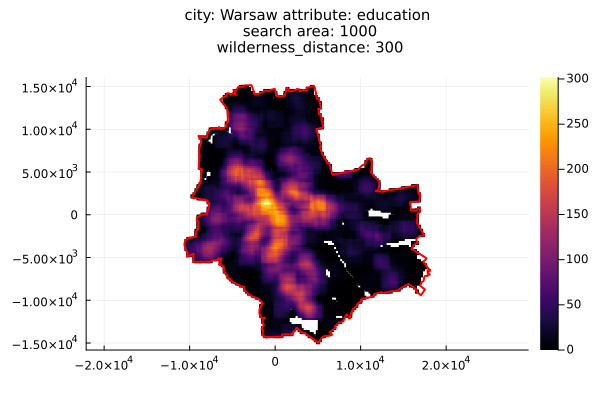

In [5]:
plot_heatmap(points_heat,attr_heat,bounds_heat,:education,"Warsaw",search_area,300)

In [6]:
city_sector = prepare_city_map(
            city, #city_name
            admin_level, #admin_level
            search_area, #search_area
            wilderness_distance, #wilderness_distance
            shape; #shape
            calculate_percent = true,
            num_of_points = num_of_points,
            scrape_config = scrape_config)

┌ Info: Read map data from cache ../data/Warszawa.osm.cache
└ @ OpenStreetMapX /home/adamkas/.julia/packages/OpenStreetMapX/gCd33/src/parseMap.jl:97


(Union{Nothing, ENU}[ENU(Inf, Inf, Inf) ENU(Inf, Inf, Inf) … ENU(Inf, Inf, Inf) ENU(Inf, Inf, Inf); ENU(Inf, Inf, Inf) ENU(Inf, Inf, Inf) … ENU(Inf, Inf, Inf) ENU(Inf, Inf, Inf); … ; ENU(Inf, Inf, Inf) ENU(Inf, Inf, Inf) … ENU(Inf, Inf, Inf) ENU(Inf, Inf, Inf); ENU(Inf, Inf, Inf) ENU(Inf, Inf, Inf) … ENU(Inf, Inf, Inf) ENU(Inf, Inf, Inf)], LLA(52.2319581, 21.0067249, 0.0), AttractivenessSpatIndex{AttractivenessMetaPOI, typeof(get_attractiveness_group)}(RTree{Float64, 2, SpatialElem{Float64, 2, Int64, OSMToolset.AttractivenessData{AttractivenessMetaPOI}}}(variant=RTreeStar, tight_mbrs=true, nearmin_overlap=32, fill_factor=0.7, split_factor=0.4, reinsert_factor=0.3, leaf_capacity=100, branch_capacity=100)
95567 element(s) in 3 level(s) (1, 10, 1000 node(s) per level):
 level=3 nchildren=10 mbr=((-19371.779302750205, -17714.358831556023), (21257.305415995823, 17737.233990507844)), 95567×10 DataFrame
   Row │ elemtype  elemid    nodeid       lat      lon      key                ⋯
       │ 

In [8]:
kd = kernel_density(city_sector,"education")

122×128 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                        ⋮              ⋱                      ⋮         
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

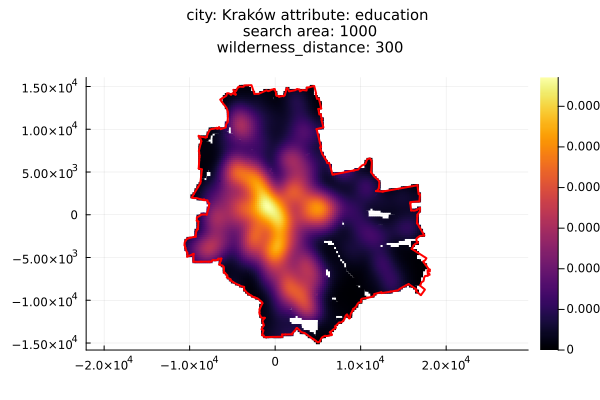

In [9]:
plot_heatmap(city_sector[1], 
            kd, 
            city_sector[5], 
            :education, 
            "Kraków",
            search_area,
            wilderness_distance)